# Exercise 8 | Recommender Systems - Collaborative Filtering Algorithm
---

In [5]:
%  Instructions
%  ------------
%
%  This file contains code that helps you get started on the
%  exercise. You will need to complete the following functions:
%
%     estimateGaussian.m
%     selectThreshold.m
%     cofiCostFunc.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.

In [6]:
%% =============== Part 1: Loading movie ratings dataset ================
%  You will start by loading the movie ratings dataset to understand the
%  structure of the data.

In [7]:
fprintf('Loading movie ratings dataset.\n\n');

Loading movie ratings dataset.



In [8]:
%  Load data
load ('ex8_movies.mat');

In [9]:
%  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies on 
%  943 users
%
%  R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a
%  rating to movie i

%  From the matrix, we can compute statistics like average rating.
fprintf('Average rating for movie 1 (Toy Story): %f / 5\n\n', ...
        mean(Y(1, R(1, :))));

Average rating for movie 1 (Toy Story): 3.878319 / 5



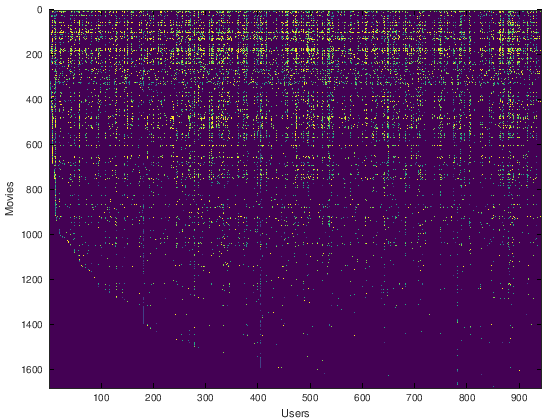

In [10]:
%  We can "visualize" the ratings matrix by plotting it with imagesc
imagesc(Y);
ylabel('Movies');
xlabel('Users');

In [11]:
%% ============ Part 2: Collaborative Filtering Cost Function ===========
%  You will now implement the cost function for collaborative filtering.
%  To help you debug your cost function, we have included set of weights
%  that we trained on that. Specifically, you should complete the code in 
%  cofiCostFunc.m to return J.

In [12]:
%  Load pre-trained weights (X, Theta, num_users, num_movies, num_features)
load ('ex8_movieParams.mat');

In [13]:
%  Reduce the data set size so that this runs faster
num_users = 4; num_movies = 5; num_features = 3;
X = X(1:num_movies, 1:num_features);
Theta = Theta(1:num_users, 1:num_features);
Y = Y(1:num_movies, 1:num_users);
R = R(1:num_movies, 1:num_users);

In [15]:
function [J, grad] = cofiCostFunc(params, Y, R, num_users, num_movies, ...
                                  num_features, lambda)
%COFICOSTFUNC Collaborative filtering cost function
%   [J, grad] = COFICOSTFUNC(params, Y, R, num_users, num_movies, ...
%   num_features, lambda) returns the cost and gradient for the
%   collaborative filtering problem.
%

% Unfold the U and W matrices from params
X = reshape(params(1:num_movies*num_features), num_movies, num_features);
Theta = reshape(params(num_movies*num_features+1:end), ...
                num_users, num_features);

            
% You need to return the following values correctly
J = 0;
X_grad = zeros(size(X));
Theta_grad = zeros(size(Theta));

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the cost function and gradient for collaborative
%               filtering. Concretely, you should first implement the cost
%               function (without regularization) and make sure it is
%               matches our costs. After that, you should implement the 
%               gradient and use the checkCostFunction routine to check
%               that the gradient is correct. Finally, you should implement
%               regularization.
%
% Notes: X - num_movies  x num_features matrix of movie features
%        Theta - num_users  x num_features matrix of user features
%        Y - num_movies x num_users matrix of user ratings of movies
%        R - num_movies x num_users matrix, where R(i, j) = 1 if the 
%            i-th movie was rated by the j-th user
%
% You should set the following variables correctly:
%
%        X_grad - num_movies x num_features matrix, containing the 
%                 partial derivatives w.r.t. to each element of X
%        Theta_grad - num_users x num_features matrix, containing the 
%                     partial derivatives w.r.t. to each element of Theta
%

predict=(X*Theta') .* R;
J=1/2*sum(sum((predict-Y) .^ 2))+lambda/2*sum(sum(Theta .^ 2))+lambda/2*sum(sum(X .^ 2));

for i=1:num_movies
    idx=find(R(i,:)==1);
    Thetatemp=Theta(idx,:);
    Ytemp=Y(i,idx);
    X_grad(i,:)=(X(i,:)*Thetatemp'-Ytemp)*Thetatemp+lambda*X(i,:);
end

for i=1:num_users
    idx=find(R(:,i)==1);
    Xtemp=X(idx,:);
    Ytemp=Y(idx,i);
    Theta_grad(i,:)=(Xtemp*Theta(i,:)'-Ytemp)'*Xtemp+lambda*Theta(i,:);
end

% =============================================================

grad = [X_grad(:); Theta_grad(:)];

end

In [16]:
%  Evaluate cost function
J = cofiCostFunc([X(:) ; Theta(:)], Y, R, num_users, num_movies, ...
               num_features, 0);

In [17]:
fprintf(['Cost at loaded parameters: %f '...
         '\n(this value should be about 22.22)\n'], J);

Cost at loaded parameters: 22.224604 
(this value should be about 22.22)


In [18]:
%% ============== Part 3: Collaborative Filtering Gradient ==============
%  Once your cost function matches up with ours, you should now implement 
%  the collaborative filtering gradient function. Specifically, you should 
%  complete the code in cofiCostFunc.m to return the grad argument.

In [19]:
fprintf('\nChecking Gradients (without regularization) ... \n');


Checking Gradients (without regularization) ... 


In [23]:
function numgrad = computeNumericalGradient(J, theta)
%COMPUTENUMERICALGRADIENT Computes the gradient using "finite differences"
%and gives us a numerical estimate of the gradient.
%   numgrad = COMPUTENUMERICALGRADIENT(J, theta) computes the numerical
%   gradient of the function J around theta. Calling y = J(theta) should
%   return the function value at theta.

% Notes: The following code implements numerical gradient checking, and 
%        returns the numerical gradient.It sets numgrad(i) to (a numerical 
%        approximation of) the partial derivative of J with respect to the 
%        i-th input argument, evaluated at theta. (i.e., numgrad(i) should 
%        be the (approximately) the partial derivative of J with respect 
%        to theta(i).)
%                

numgrad = zeros(size(theta));
perturb = zeros(size(theta));
e = 1e-4;
for p = 1:numel(theta)
    % Set perturbation vector
    perturb(p) = e;
    loss1 = J(theta - perturb);
    loss2 = J(theta + perturb);
    % Compute Numerical Gradient
    numgrad(p) = (loss2 - loss1) / (2*e);
    perturb(p) = 0;
end

end


In [21]:
function checkCostFunction(lambda)
%CHECKCOSTFUNCTION Creates a collaborative filering problem 
%to check your cost function and gradients
%   CHECKCOSTFUNCTION(lambda) Creates a collaborative filering problem 
%   to check your cost function and gradients, it will output the 
%   analytical gradients produced by your code and the numerical gradients 
%   (computed using computeNumericalGradient). These two gradient 
%   computations should result in very similar values.

% Set lambda
if ~exist('lambda', 'var') || isempty(lambda)
    lambda = 0;
end

%% Create small problem
X_t = rand(4, 3);
Theta_t = rand(5, 3);

% Zap out most entries
Y = X_t * Theta_t';
Y(rand(size(Y)) > 0.5) = 0;
R = zeros(size(Y));
R(Y ~= 0) = 1;

%% Run Gradient Checking
X = randn(size(X_t));
Theta = randn(size(Theta_t));
num_users = size(Y, 2);
num_movies = size(Y, 1);
num_features = size(Theta_t, 2);

numgrad = computeNumericalGradient( ...
                @(t) cofiCostFunc(t, Y, R, num_users, num_movies, ...
                                num_features, lambda), [X(:); Theta(:)]);

[cost, grad] = cofiCostFunc([X(:); Theta(:)],  Y, R, num_users, ...
                          num_movies, num_features, lambda);

disp([numgrad grad]);
fprintf(['The above two columns you get should be very similar.\n' ...
         '(Left-Your Numerical Gradient, Right-Analytical Gradient)\n\n']);

diff = norm(numgrad-grad)/norm(numgrad+grad);
fprintf(['If your cost function implementation is correct, then \n' ...
         'the relative difference will be small (less than 1e-9). \n' ...
         '\nRelative Difference: %g\n'], diff);

end

In [24]:
%  Check gradients by running checkNNGradients
checkCostFunction;

   0.306033   0.306033
   0.641760   0.641760
  -1.671682  -1.671682
  -1.731810  -1.731810
  -0.983513  -0.983513
   0.877056   0.877056
   2.666462   2.666462
  -2.310998  -2.310998
   2.306515   2.306515
  -0.531115  -0.531115
  -2.097183  -2.097183
  -1.916618  -1.916618
   0.055206   0.055206
   0.794125   0.794125
  -0.447015  -0.447015
   0.245330   0.245330
   1.980559   1.980559
   0.292212   0.292212
   0.140751   0.140751
  -0.240568  -0.240568
   0.752056   0.752056
   1.503724   1.503724
  -1.401060  -1.401060
  -0.559625  -0.559625
  -1.456716  -1.456716
  -1.115244  -1.115244
   4.214195   4.214195
The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)

If your cost function implementation is correct, then 
the relative difference will be small (less than 1e-9). 

Relative Difference: 1.01995e-12


In [25]:
%% ========= Part 4: Collaborative Filtering Cost Regularization ========
%  Now, you should implement regularization for the cost function for 
%  collaborative filtering. You can implement it by adding the cost of
%  regularization to the original cost computation.

In [26]:
%  Evaluate cost function
J = cofiCostFunc([X(:) ; Theta(:)], Y, R, num_users, num_movies, ...
               num_features, 1.5);

In [27]:
fprintf(['Cost at loaded parameters (lambda = 1.5): %f '...
         '\n(this value should be about 31.34)\n'], J);

Cost at loaded parameters (lambda = 1.5): 31.344056 
(this value should be about 31.34)


In [28]:
%% ======= Part 5: Collaborative Filtering Gradient Regularization ======
%  Once your cost matches up with ours, you should proceed to implement 
%  regularization for the gradient. 

In [29]:
fprintf('\nChecking Gradients (with regularization) ... \n');


Checking Gradients (with regularization) ... 


In [30]:
%  Check gradients by running checkNNGradients
checkCostFunction(1.5);

   11.20274   11.20274
   -0.25359   -0.25359
   -0.17216   -0.17216
   -0.96147   -0.96147
  -18.37088  -18.37088
    0.87221    0.87221
   -4.41772   -4.41772
   -5.64516   -5.64516
  -13.01404  -13.01404
    2.42593    2.42593
   -1.76348   -1.76348
   -3.91328   -3.91328
   -0.46916   -0.46916
   -6.59182   -6.59182
   -2.30457   -2.30457
   -2.80742   -2.80742
    1.18668    1.18668
    4.13835    4.13835
   11.90824   11.90824
    3.47982    3.47982
   -5.43189   -5.43189
    1.00306    1.00306
    1.44362    1.44362
   15.72852   15.72852
    4.17241    4.17241
   -3.03453   -3.03453
   -1.41778   -1.41778
The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)

If your cost function implementation is correct, then 
the relative difference will be small (less than 1e-9). 

Relative Difference: 2.01993e-12


In [31]:
%% ============== Part 6: Entering ratings for a new user ===============
%  Before we will train the collaborative filtering model, we will first
%  add ratings that correspond to a new user that we just observed. This
%  part of the code will also allow you to put in your own ratings for the
%  movies in our dataset!

In [34]:
function movieList = loadMovieList()
%GETMOVIELIST reads the fixed movie list in movie.txt and returns a
%cell array of the words
%   movieList = GETMOVIELIST() reads the fixed movie list in movie.txt 
%   and returns a cell array of the words in movieList.


%% Read the fixed movieulary list
fid = fopen('movie_ids.txt');

% Store all movies in cell array movie{}
n = 1682;  % Total number of movies 

movieList = cell(n, 1);
for i = 1:n
    % Read line
    line = fgets(fid);
    % Word Index (can ignore since it will be = i)
    [idx, movieName] = strtok(line, ' ');
    % Actual Word
    movieList{i} = strtrim(movieName);
end
fclose(fid);

end


In [35]:
movieList = loadMovieList();

In [36]:
%  Initialize my ratings
my_ratings = zeros(1682, 1);

In [37]:
% Check the file movie_idx.txt for id of each movie in our dataset
% For example, Toy Story (1995) has ID 1, so to rate it "4", you can set
my_ratings(1) = 4;

In [38]:
% Or suppose did not enjoy Silence of the Lambs (1991), you can set
my_ratings(98) = 2;

In [39]:
% We have selected a few movies we liked / did not like and the ratings we
% gave are as follows:
my_ratings(7) = 3;
my_ratings(12)= 5;
my_ratings(54) = 4;
my_ratings(64)= 5;
my_ratings(66)= 3;
my_ratings(69) = 5;
my_ratings(183) = 4;
my_ratings(226) = 5;
my_ratings(355)= 5;

In [40]:
fprintf('\n\nNew user ratings:\n');
for i = 1:length(my_ratings)
    if my_ratings(i) > 0 
        fprintf('Rated %d for %s\n', my_ratings(i), ...
                 movieList{i});
    end
end



New user ratings:
Rated 4 for Toy Story (1995)
Rated 3 for Twelve Monkeys (1995)
Rated 5 for Usual Suspects, The (1995)
Rated 4 for Outbreak (1995)
Rated 5 for Shawshank Redemption, The (1994)
Rated 3 for While You Were Sleeping (1995)
Rated 5 for Forrest Gump (1994)
Rated 2 for Silence of the Lambs, The (1991)
Rated 4 for Alien (1979)
Rated 5 for Die Hard 2 (1990)
Rated 5 for Sphere (1998)


In [41]:
%% ================== Part 7: Learning Movie Ratings ====================
%  Now, you will train the collaborative filtering model on a movie rating 
%  dataset of 1682 movies and 943 users

In [42]:
fprintf('\nTraining collaborative filtering...\n');


Training collaborative filtering...


In [43]:
%  Load data
load('ex8_movies.mat');

In [44]:
%  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies by 
%  943 users
%
%  R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a
%  rating to movie i

In [45]:
%  Add our own ratings to the data matrix
Y = [my_ratings Y];
R = [(my_ratings ~= 0) R];

In [47]:
function [Ynorm, Ymean] = normalizeRatings(Y, R)
%NORMALIZERATINGS Preprocess data by subtracting mean rating for every 
%movie (every row)
%   [Ynorm, Ymean] = NORMALIZERATINGS(Y, R) normalized Y so that each movie
%   has a rating of 0 on average, and returns the mean rating in Ymean.
%

[m, n] = size(Y);
Ymean = zeros(m, 1);
Ynorm = zeros(size(Y));
for i = 1:m
    idx = find(R(i, :) == 1);
    Ymean(i) = mean(Y(i, idx));
    Ynorm(i, idx) = Y(i, idx) - Ymean(i);
end
end

In [48]:
%  Normalize Ratings
[Ynorm, Ymean] = normalizeRatings(Y, R);

In [49]:
%  Useful Values
num_users = size(Y, 2);
num_movies = size(Y, 1);
num_features = 10;

In [50]:
% Set Initial Parameters (Theta, X)
X = randn(num_movies, num_features);
Theta = randn(num_users, num_features);

initial_parameters = [X(:); Theta(:)];

In [51]:
% Set options for fmincg
options = optimset('GradObj', 'on', 'MaxIter', 100);

In [52]:
% Set Regularization
lambda = 10;
theta = fmincg (@(t)(cofiCostFunc(t, Ynorm, R, num_users, num_movies, ...
                                num_features, lambda)), ...
                initial_parameters, options);

Iteration   100 | Cost: 3.895769e+04


In [53]:
% Unfold the returned theta back into U and W
X = reshape(theta(1:num_movies*num_features), num_movies, num_features);
Theta = reshape(theta(num_movies*num_features+1:end), ...
                num_users, num_features);

In [54]:
fprintf('Recommender system learning completed.\n');

Recommender system learning completed.


In [55]:
%% ================== Part 8: Recommendation for you ====================
%  After training the model, you can now make recommendations by computing
%  the predictions matrix.

In [56]:
p = X * Theta';
my_predictions = p(:,1) + Ymean;
movieList = loadMovieList();
[r, ix] = sort(my_predictions, 'descend');

In [57]:
fprintf('\nTop recommendations for you:\n');
for i=1:10
    j = ix(i);
    fprintf('Predicting rating %.1f for movie %s\n', my_predictions(j), ...
            movieList{j});
end


Top recommendations for you:
Predicting rating 5.0 for movie Santa with Muscles (1996)
Predicting rating 5.0 for movie Marlene Dietrich: Shadow and Light (1996)
Predicting rating 5.0 for movie Star Kid (1997)
Predicting rating 5.0 for movie Saint of Fort Washington, The (1993)
Predicting rating 5.0 for movie Aiqing wansui (1994)
Predicting rating 5.0 for movie They Made Me a Criminal (1939)
Predicting rating 5.0 for movie Great Day in Harlem, A (1994)
Predicting rating 5.0 for movie Someone Else's America (1995)
Predicting rating 5.0 for movie Entertaining Angels: The Dorothy Day Story (1996)
Predicting rating 5.0 for movie Prefontaine (1997)


In [59]:
fprintf('\n\nOriginal ratings provided:\n');
for i = 1:length(my_ratings)
    if my_ratings(i) > 0 
        fprintf('Rated %d for %s\n', my_ratings(i), ...
                 movieList{i});
    end
end



Original ratings provided:
Rated 4 for Toy Story (1995)
Rated 3 for Twelve Monkeys (1995)
Rated 5 for Usual Suspects, The (1995)
Rated 4 for Outbreak (1995)
Rated 5 for Shawshank Redemption, The (1994)
Rated 3 for While You Were Sleeping (1995)
Rated 5 for Forrest Gump (1994)
Rated 2 for Silence of the Lambs, The (1991)
Rated 4 for Alien (1979)
Rated 5 for Die Hard 2 (1990)
Rated 5 for Sphere (1998)
